## Code Anuj-Anupam

In [1]:
import json
import sys
import pathlib
import rasterio
from rasterio.mask import mask

In [2]:
tiffFileName=r"C:\Users\AJain7\Downloads\landsat7_india_500_2011-01-01_2011-04-17.tif"
jsonFileName=r"C:\Users\AJain7\OneDrive - Stryker\Personal\Projects\Satellite Project\District-Level Training\2011_Dist.geojson"
output_folder_path = 'districtTiffFiles500'

In [3]:
countryData = json.loads(open(jsonFileName).read())

In [4]:
for currDistrictFeature in countryData["features"]:
	# currDistrictFeature=countryData["features"][0]
	distName=currDistrictFeature["properties"]['DISTRICT']
	st_cen_cd=currDistrictFeature["properties"]['ST_CEN_CD']
	st_name=currDistrictFeature["properties"]['ST_NM']
	censuscode=currDistrictFeature["properties"]['censuscode']
	geoms=currDistrictFeature["geometry"]
	listGeom=[]
	listGeom.append(geoms)
	geoms=listGeom
	with rasterio.open(tiffFileName) as src:
		out_image, out_transform = mask(src, geoms, crop=True)

	out_meta = src.meta.copy()

	# save the resulting raster  
	out_meta.update({"driver": "GTiff",
		"height": out_image.shape[1],
		"width": out_image.shape[2],
		"transform": out_transform})

	# path_to_district_tiffs=output_folder_path + '\\' + str(st_name)
	path_to_district_tiffs=output_folder_path
	pathlib.Path(path_to_district_tiffs).mkdir(parents=True, exist_ok=True)

	with rasterio.open(path_to_district_tiffs +'\\'+ distName + '@' + str(st_cen_cd) + '@' + str(censuscode) + ".tiff", "w", **out_meta) as dest:
		dest.write(out_image)

## Code Phaneesh

In [1]:
import json
import sys
import os
import pathlib
import rasterio
from rasterio.mask import mask
import shutil

In [47]:
tiffFolderPath = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/dd"
jsonFileName='2011_Dist.geojson'
output_folder_path = 'f1'

In [48]:
countryData = json.loads(open(jsonFileName).read())

In [49]:
for currDistrictFeature in countryData["features"]:
	# currDistrictFeature=countryData["features"][0]
	distName=currDistrictFeature["properties"]['DISTRICT']
	st_cen_cd=currDistrictFeature["properties"]['ST_CEN_CD']
	st_name=currDistrictFeature["properties"]['ST_NM']
	censuscode=currDistrictFeature["properties"]['censuscode']
	geoms=currDistrictFeature["geometry"]
	listGeom=[]
	listGeom.append(geoms)
	geoms=listGeom
	
	flag_dist_found = False

	for satTiff in os.listdir(tiffFolderPath):
		if '.DS' in satTiff:
			pass
		else:
			tiffFile = os.path.join(tiffFolderPath, satTiff)
			try:
				with rasterio.open(tiffFile) as src:
					out_image, out_transform = mask(src, geoms, crop=True)
			except rasterio.errors.WindowError:
	# 			print("!!! WINDOW ERROR !!!")
				continue
			except ValueError:
	# 			print('!!!Value Error!!!')
	# 			print('dist: ', distName ,'\tState:', st_name)
				continue
			flag_dist_found = True
	
	if flag_dist_found == False:
# 		print('dist Not found in any tiff file', distName, "  ", st_name)
		continue
	# try:
	# 	with rasterio.open(tiffFileName) as src:
	# 		out_image, out_transform = mask(src, geoms, crop=True)
	# except rasterio.errors.WindowError:
	# 	print("!!! WINDOW ERROR !!!")
	# 	continue
	# except ValueError:
	# 	print('!!!Value Error!!!')
	# 	print('dist: ', distName ,'\tState:', st_name)
	# 	continue

	out_meta = src.meta.copy()

	# save the resulting raster  
	out_meta.update({"driver": "GTiff",
		"height": out_image.shape[1],
		"width": out_image.shape[2],
		"transform": out_transform})

	# path_to_district_tiffs=output_folder_path + '/' + str(st_name)
	path_to_district_tiffs=output_folder_path
	pathlib.Path(path_to_district_tiffs).mkdir(parents=True, exist_ok=True)

	with rasterio.open(path_to_district_tiffs +'/'+ distName + '@' + str(st_cen_cd) + '@' + str(censuscode) + ".tiff", "w", **out_meta) as dest:
		dest.write(out_image)

In [155]:
da = rasterio.open("/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_1/Adilabad@28@532.tiff")

In [158]:
da.read().shape

(10, 1372, 2471)

## Code Arpit

In [2]:
import rasterio
%matplotlib inline

In [3]:
def merge_file(filea, fileb, debug=False):
    '''
    filea, fileb should be filepaths
    '''
    sizea = os.stat(filea).st_size
    copya = ['yes' if 'copy' in filea else 'no'][0]
    sizeb = os.stat(fileb).st_size
    copyb = ['yes' if 'copy' in fileb else 'no'][0]

    dataseta = rasterio.open(filea)
    band1a, band2a, band3a,band4a, band5a = dataseta.read(1), dataseta.read(2), dataseta.read(3), dataseta.read(4), dataseta.read(5)
    band6a = dataseta.read(6)
    band7a = dataseta.read(7)
    band8a = dataseta.read(8)
    band9a = dataseta.read(9)
    band10a = dataseta.read(10)

    datasetb = rasterio.open(fileb)
    band1b = datasetb.read(1)
    band2b = datasetb.read(2)
    band3b = datasetb.read(3)
    band4b = datasetb.read(4)
    band5b = datasetb.read(5)
    band6b = datasetb.read(6)
    band7b = datasetb.read(7)
    band8b = datasetb.read(8)
    band9b = datasetb.read(9)
    band10b = datasetb.read(10)
    
    if debug:
        print(sizea, sizeb, copya, copyb)

    x1 = band1a.shape[0]
    y1 = band1a.shape[1]
    x2 = band1b.shape[0]
    y2 = band1b.shape[1]

    if (x1==x2):
        if debug:
            print('x1-x2')
        
        if ((sizea>sizeb) and (copya=='yes')):
            combine1 = np.hstack((band1b, band1a))
            combine2 = np.hstack((band2b, band2a))
            combine3 = np.hstack((band3b, band3a))
            combine4 = np.hstack((band4b, band4a))
            combine5 = np.hstack((band5b, band5a))
            combine6 = np.hstack((band6b, band6a))
            combine7 = np.hstack((band7b, band7a))
            combine8 = np.hstack((band8b, band8a))
            combine9 = np.hstack((band9b, band9a))
            combine10 = np.hstack((band10b, band10a))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
        elif ((sizea>sizeb) and (copya=='no')):
            combine1 = np.hstack((band1a, band1b))
            combine2 = np.hstack((band2a, band2b))
            combine3 = np.hstack((band3a, band3b))
            combine4 = np.hstack((band4a, band4b))
            combine5 = np.hstack((band5a, band5b))
            combine6 = np.hstack((band6a, band6b))
            combine7 = np.hstack((band7a, band7b))
            combine8 = np.hstack((band8a, band8b))
            combine9 = np.hstack((band9a, band9b))
            combine10 = np.hstack((band10a, band10b))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
        elif ((sizeb>sizea) and (copyb=='yes')):
            combine1 = np.hstack((band1a, band1b))
            combine2 = np.hstack((band2a, band2b))
            combine3 = np.hstack((band3a, band3b))
            combine4 = np.hstack((band4a, band4b))
            combine5 = np.hstack((band5a, band5b))
            combine6 = np.hstack((band6a, band6b))
            combine7 = np.hstack((band7a, band7b))
            combine8 = np.hstack((band8a, band8b))
            combine9 = np.hstack((band9a, band9b))
            combine10 = np.hstack((band10a, band10b))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
        elif ((sizeb>sizea) and (copyb=='no')):
            combine1 = np.hstack((band1b, band1a))
            combine2 = np.hstack((band2b, band2a))
            combine3 = np.hstack((band3b, band3a))
            combine4 = np.hstack((band4b, band4a))
            combine5 = np.hstack((band5b, band5a))
            combine6 = np.hstack((band6b, band6a))
            combine7 = np.hstack((band7b, band7a))
            combine8 = np.hstack((band8b, band8a))
            combine9 = np.hstack((band9b, band9a))
            combine10 = np.hstack((band10b, band10a))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
    elif (y1==y2):
        if debug:
            print('y1-y2')
        
        if ((sizea>sizeb) and (copya=='yes')):
            combine1 = np.vstack((band1b, band1a))
            combine2 = np.vstack((band2b, band2a))
            combine3 = np.vstack((band3b, band3a))
            combine4 = np.vstack((band4b, band4a))
            combine5 = np.vstack((band5b, band5a))
            combine6 = np.vstack((band6b, band6a))
            combine7 = np.vstack((band7b, band7a))
            combine8 = np.vstack((band8b, band8a))
            combine9 = np.vstack((band9b, band9a))
            combine10 = np.vstack((band10b, band10a))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
        elif ((sizea>sizeb) and (copya=='no')):
            combine1 = np.vstack((band1a, band1b))
            combine2 = np.vstack((band2a, band2b))
            combine3 = np.vstack((band3a, band3b))
            combine4 = np.vstack((band4a, band4b))
            combine5 = np.vstack((band5a, band5b))
            combine6 = np.vstack((band6a, band6b))
            combine7 = np.vstack((band7a, band7b))
            combine8 = np.vstack((band8a, band8b))
            combine9 = np.vstack((band9a, band9b))
            combine10 = np.vstack((band10a, band10b))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
        elif ((sizeb>sizea) and (copyb=='yes')):
            combine1 = np.vstack((band1a, band1b))
            combine2 = np.vstack((band2a, band2b))
            combine3 = np.vstack((band3a, band3b))
            combine4 = np.vstack((band4a, band4b))
            combine5 = np.vstack((band5a, band5b))
            combine6 = np.vstack((band6a, band6b))
            combine7 = np.vstack((band7a, band7b))
            combine8 = np.vstack((band8a, band8b))
            combine9 = np.vstack((band9a, band9b))
            combine10 = np.vstack((band10a, band10b))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))
        elif ((sizeb>sizea) and (copyb=='no')):
            combine1 = np.vstack((band1b, band1a))
            combine2 = np.vstack((band2b, band2a))
            combine3 = np.vstack((band3b, band3a))
            combine4 = np.vstack((band4b, band4a))
            combine5 = np.vstack((band5b, band5a))
            combine6 = np.vstack((band6b, band6a))
            combine7 = np.vstack((band7b, band7a))
            combine8 = np.vstack((band8b, band8a))
            combine9 = np.vstack((band9b, band9a))
            combine10 = np.vstack((band10b, band10a))
            final_image = np.stack((combine1, combine2, combine3, combine4, combine5, combine6, combine7, combine8, combine9, combine10))

    if debug:
        print(band1a.shape)
        print(band1b.shape)
#         print(combine1.shape)
        print(final_image.shape)
        print('--------------')
        
    return final_image

In [66]:
filea = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_data/Agra@9@146 copy.tiff"
fileb = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_data/Agra@9@146.tiff"
image = merge_file(filea, fileb, debug=True)
print(image.shape)

46015348 1281604 yes no
x1-x2
(744, 1546)
(744, 43)
(10, 744, 1589)
--------------
(10, 744, 1589)


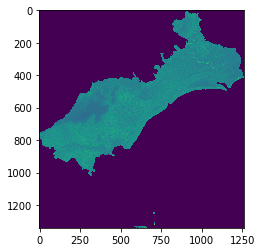

In [161]:
plt.imshow(combine1)

In [9]:
filea = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_data/Barddhaman@19@335 copy.tiff"
fileb = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_data/Barddhaman@19@335.tiff"

sizea = os.stat(filea).st_size
copya = ['yes' if 'copy' in filea else 'no'][0]
sizeb = os.stat(fileb).st_size
copyb = ['yes' if 'copy' in fileb else 'no'][0]

dataseta = rasterio.open(filea)
band1a, band2a, band3a,band4a, band5a = dataseta.read(1), dataseta.read(2), dataseta.read(3), dataseta.read(4), dataseta.read(5)
band6a = dataseta.read(6)
band7a = dataseta.read(7)
band8a = dataseta.read(8)
band9a = dataseta.read(9)
band10a = dataseta.read(10)

datasetb = rasterio.open(fileb)
band1b = datasetb.read(1)
band2b = datasetb.read(2)
band3b = datasetb.read(3)
band4b = datasetb.read(4)
band5b = datasetb.read(5)
band6b = datasetb.read(6)
band7b = datasetb.read(7)
band8b = datasetb.read(8)
band9b = datasetb.read(9)
band10b = datasetb.read(10)

# if debug:
print(sizea, sizeb, copya, copyb)

x1 = band1a.shape[0]
y1 = band1a.shape[1]
x2 = band1b.shape[0]
y2 = band1b.shape[1]

if (x1==x2):
#     if de?bug:
    print('x1-x2')

    if ((sizea>sizeb) and (copya=='yes')):
        combine1 = np.hstack((band1b, band1a))
        
    elif ((sizea>sizeb) and (copya=='no')):
        combine1 = np.hstack((band1a, band1b))
        
    elif ((sizeb>sizea) and (copyb=='yes')):
        combine1 = np.hstack((band1a, band1b))
        
    elif ((sizeb>sizea) and (copyb=='no')):
        combine1 = np.hstack((band1b, band1a))
        
elif (y1==y2):
#     if debu?g:
    print('y1-y2')

    if ((sizea>sizeb) and (copya=='yes')):
        combine1 = np.vstack((band1b, band1a))
        
    elif ((sizea>sizeb) and (copya=='no')):
        combine1 = np.vstack((band1a, band1b))
        
    elif ((sizeb>sizea) and (copyb=='yes')):
        combine1 = np.vstack((band1a, band1b))
        
    elif ((sizeb>sizea) and (copyb=='no')):
        combine1 = np.vstack((band1b, band1a))
        


print(band1a.shape)
print(band1b.shape)
#         print(combine1.shape)
# print(final_image.shape)
print('--------------')

71859124 4528564 yes no
x1-x2
(1056, 1701)
(1056, 107)
--------------


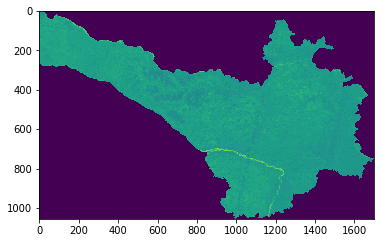

In [10]:
plt.imshow(band1a)

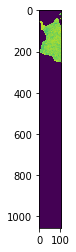

In [11]:
plt.imshow(band1b)

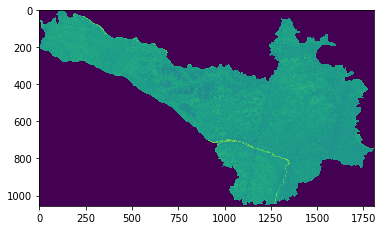

In [12]:
plt.imshow(combine1)

In [114]:
# if y coordi same - vstck
# if x coordi same - hstack

In [2]:
import shutil

In [4]:
# For moving files which have a copy to another folder for processing
folder_path = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/"
copy_folder_path = "/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_date_2019/"
district_with_copy = []
for files in os.listdir(folder_path):
    if 'copy' in files:
        district_code = files.split("@")[2].split(" ")[0]
#         print()
        district_with_copy.append(district_code)

print(len(district_with_copy))
district_with_copy = list(set(district_with_copy))
print(len(district_with_copy))

for files in os.listdir(folder_path):
    if 'DS_Store' in files:
        continue
    else:
        district_code = files.split("@")[2].split(" ")
        if (len(district_code)==1):
            district_code = district_code[0].split(".tiff")[0]
            if district_code in district_with_copy:
                old_file_path = os.path.join(folder_path, files)
                new_file_path = os.path.join(copy_folder_path, files)
                shutil.move(old_file_path, new_file_path)
        else:
            district_code = district_code[0]
            if district_code in district_with_copy:
                old_file_path = os.path.join(folder_path, files)
                new_file_path = os.path.join(copy_folder_path, files)
                shutil.move(old_file_path, new_file_path)

137
123


In [171]:
# for files in os.listdir("/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_1"):
#     if 'DS_Store' in files:
#         continue
#     else:
#         district_code = files.split("@")[2].split(" ")
#         print(district_code)

In [5]:
copy_filepaths = np.array([os.path.join(copy_folder_path, files) for files in os.listdir(copy_folder_path)])
# copy_files = [files for files in os.listdir(copy_folder_path)]
def helper_func(a):
    if '.DS' in a:
        pass
    else:
        district_code = a.split("@")[2].split(" ")
        if (len(district_code)==1):
            district_code = district_code[0].split(".tiff")[0]
        else:
            district_code = district_code[0]
        return district_code
copy_district_code = np.array([helper_func(file) for file in os.listdir(copy_folder_path)])
district_with_copy = list(set(copy_district_code))

In [6]:
len(district_with_copy)

123

In [7]:
copy_district_code

array(['572', '378', '87', '102', '85', '503', '580', '362', '538', '71',
       '258', '584', '538', '445', '416', '552', '625', '522', '447',
       '256', '628', '114', '423', '399', '25', '139', '542', '624',
       '525', '571', '624', '141', '259', '258', '150', '378', '259',
       '241', '633', '350', '579', '419', '510', '540', '213', '534',
       '145', '379', '448', '143', '257', '258', '443', '340', '225',
       '535', '598', '335', '449', '4', '543', '241', '627', '259', '511',
       '559', '502', '150', '512', '553', '363', '253', '357', '458',
       '149', '344', '416', '399', '377', '89', '340', '534', '419',
       '251', '398', '510', '357', '249', '208', '612', '258', '0', '520',
       '253', '344', '202', '103', '25', '180', '133', '633', '32', '626',
       '445', '260', '335', '139', '208', '446', '582', '537', '520',
       '612', '552', '559', '250', '582', '87', '502', '587', '379',
       '138', '149', '501', '143', '533', '256', '152', '524', '111',
    

In [58]:
copy_filepaths[56]

'/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_date_2017/Alappuzha@32@598.tiff'

In [12]:
for district_code in district_with_copy:
    arr = np.where(copy_district_code==district_code)
#     print(district_code)
#     print(arr[0])
    if (len(arr[0])==2):
        file1, file2 = copy_filepaths[arr[0][0]], copy_filepaths[arr[0][1]]
        if 'copy' in os.path.split(file1)[1]:
            filename = os.path.split(file1)[1].split(" copy")[0]
        else:
            filename = os.path.split(file1)[1].split(".tiff")[0]
#         print(filename)
        
        try:
            final_image = merge_file(file1, file2, debug=True)
            filepath = folder_path + filename
            print(filepath)
            print('-------------')
            pickle.dump(final_image, open(filepath +'.pkl',"wb"))
        except Exception as e:
            print(e)
        
    elif (len(arr[0])==4):
        file1, file2 = copy_filepaths[arr[0][0]], copy_filepaths[arr[0][1]]
        file3, file4 = copy_filepaths[arr[0][2]], copy_filepaths[arr[0][3]]
#         print(district_code)
#         print(file1)
#         print(file2)
#         print(file3)
#         print(file4)
#         print("-------")

11140972 3968092 no yes
x1-x2
(627, 444)
(627, 158)
(10, 627, 602)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Yamunanagar@6@71
-------------
1146748 284667916 no yes
y1-y2
(9, 3184)
(2235, 3184)
(10, 2244, 3184)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Jaisalmer@8@114
-------------
52633236 14617236 no yes
x1-x2
(1100, 1196)
(1100, 332)
(10, 1100, 1528)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Dibang Valley@12@257
-------------
5435540 1538468 no yes
x1-x2
(388, 350)
(388, 99)
(10, 388, 449)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Faridabad@6@88
-------------
1138396 8565876 yes no
x1-x2
(580, 49)
(580, 369)
(10, 580, 418)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Baghpat@9@139
-------------
'/Users/arpitjain/Downloads/SatPRo/2001_L7_data/duplicate_date_2019/Puruliya@19@340.tiff' n

23822260 22773940 yes no
x1-x2
(1248, 477)
(1248, 456)
(10, 1248, 933)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Tiruppur@33@633
-------------
71955844 891964 yes no
x1-x2
(966, 1862)
(966, 23)
(10, 966, 1885)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Medak@28@535
-------------
18920036 79356036 yes no
x1-x2
(1450, 326)
(1450, 1368)
(10, 1450, 1694)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Mayurbhanj@21@376
-------------
479164 44118972 yes no
x1-x2
(847, 14)
(847, 1302)
(10, 847, 1316)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Yadgir@29@580
-------------
26705556 240676 yes no
x1-x2
(740, 902)
(740, 8)
(10, 740, 910)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Dumka@20@362
-------------
14211604 11576724 no yes
x1-x2
(716, 496)
(716, 404)
(10, 716, 900)
--------------
/Users/arpitjain

25120236 3915660 yes no
y1-y2
(725, 866)
(113, 866)
(10, 838, 866)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/North@11@241
-------------
4141356 12855292 yes no
y1-y2
(115, 900)
(357, 900)
(10, 472, 900)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Pathanamthitta@32@599
-------------
7523268 11802508 yes no
x1-x2
(899, 209)
(899, 328)
(10, 899, 537)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Bhopal@23@444
-------------
15304708 5858908 yes no
x1-x2
(519, 737)
(519, 282)
(10, 519, 1019)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Bhagalpur@10@224
-------------
56161108 23429428 yes no
x1-x2
(1164, 1206)
(1164, 503)
(10, 1164, 1709)
--------------
/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/Betul@23@447
-------------
42775972 56168692 no yes
y1-y2
(527, 2029)
(692, 2029)
(10, 1219, 2029)
--------------
/Users/

In [13]:
pkl_ = []
tiff_ = []
for files in os.listdir("/Users/arpitjain/Downloads/SatPRo/2001_L7_data/districtTiff100_2019/"):
    if '.pkl' in files:
        pkl_.append(files)
    elif '.tiff' in files:
        tiff_.append(files)

In [14]:
len(pkl_)

113

In [15]:
len(tiff_)

518

In [16]:
518+116

634

In [17]:
len(pkl_)

113

In [18]:
len(tiff_)

518